In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
from hyperbolic_random_graphs import *
from math import factorial
from scipy.special import gamma
from scipy.integrate import quad

def connection_prob(Dtheta, kappa_i, kappa_j, D, beta, R=1, mu=1):
    chi = R * Dtheta
    chi /= (mu * kappa_i * kappa_j)**(1./D)
    return 1./(1 + chi**beta)

def angular_prob(Dtheta, D):
    a = gamma((D+1)/2) / gamma(D/2)
    b = np.sin(Dtheta)**(D-1)
    return a*b/np.sqrt(np.pi)

def integrand(Dtheta, kappa_i, kappa_j, D, beta, R=1, mu=1):
    a = connection_prob(Dtheta, kappa_i, kappa_j, D, beta, R, mu)
    b = angular_prob(Dtheta, D)
    return a*b

def integrated_connection_prob(kappa_i, kappa_j, D, beta, R=1, mu=1):
    args = (kappa_i, kappa_j, D, beta, R, mu)
    return quad(integrand, 0, np.pi, args=args)

def bfk_term(n, m, a, b):
    t = a**(-2*n-2) * (-1)**m / (b*m + 2*n +2)
    tt = np.pi**(-b*(m+1) + 2*n + 2) * (-1)**m / ((-b*(m+1) + 2*n + 2) * a**(b*(m+1)))
    ttt = a**(-2*n-2) * (-1)**m / (-b*(m+1) + 2*n + 2)
    out = (t + tt - ttt)*(-1)**n
    return out / factorial(2*n + 1)

def alpha(R, kappa_i, kappa_j, mu, D):
    denum = (mu*kappa_i*kappa_j)**(1./D)
    return R / denum

In [104]:
kappa_i, kappa_j = 1., 1.
beta = 10.
mu = 0.1
D = 2
R = compute_radius(1000, D)
a = alpha(R, kappa_i, kappa_j, mu, D)
print(1/a)

n,m = 4, 20
S = 0
for i in range(n):
    for j in range(m):
        S += bfk_term(i, j, a, beta)
        
denum, error = integrated_connection_prob(kappa_i, kappa_j, D, beta, R=R, mu=mu)
print(D, 'sum is ', S/2)
print('int is', denum, error)
1/a

0.03544907701811033
2 sum is  0.00033264032987410664
int is 0.0003357800119689931 3.3600329117950832e-12


0.03544907701811033

In [105]:
def integrand2(Dtheta, kappa_i, kappa_j, D, beta, R, mu, n):
    denum = 1 + (R*Dtheta / (mu*kappa_i*kappa_j)**(1./D) )**beta
    return Dtheta**(2*n + 1) / denum
S2 = 0
for n in range(10):
    int2, error = quad(integrand2, 0, np.pi, args=((kappa_i, kappa_j, D, beta, R, mu, n)))
    S2 += (-1)**n / factorial(2*n + 1) * int2
print(S2/2, error)

0.0003357800108032326 3.258053990224205e-25


In [106]:
a = alpha(R, kappa_i, kappa_j, mu, D)
def integrand3i(Dtheta, a, b, n, m):
    return Dtheta**(2*n + 1) * (-(a*Dtheta)**b)**m

def integrand3ii(Dtheta, a, b, n, m):
    return Dtheta**(2*n + 1) * (-1./(a*Dtheta)**b)**m / (a*Dtheta)**b

S3 = 0
for n in range(20):
    for m in range(100):
        int3i, erri = quad(integrand3i, 0, 1./a, args=(a, beta, n, m))
        int3ii, errii = quad(integrand3ii, 1./a, np.pi, args=(a, beta, n, m))
        #print(erri, errii, n , m)
        S3 += (-1)**n / factorial(2*n + 1) * (int3i + int3ii)
print(S3/2)

0.00033823870006128215


In [107]:
def integrand4i(Dtheta, a, b, n, m):
    s = 0 
    for ell in range(m):
        s += (-(a*Dtheta)**b)**ell
    return s * Dtheta**(2*n + 1)

def integrand4ii(Dtheta, a, b, n, m):
    s = 0 
    for ell in range(m):
        s += (-1./(a*Dtheta)**b)**ell
    return s * Dtheta**(2*n + 1) / (a*Dtheta)**b

S4 = 0 
m=1000
for n in range(20):
    int4i, erri = quad(integrand4i, 0, 1./a, args=(a, beta, n, m))
    int4ii, errii = quad(integrand4ii, 1./a, np.pi, args=(a, beta, n, m))
    S4 += (-1)**n / factorial(2*n + 1) * (int4i + int4ii)
    #print(erri, errii)
print(S4/2)

0.00033578001201725344


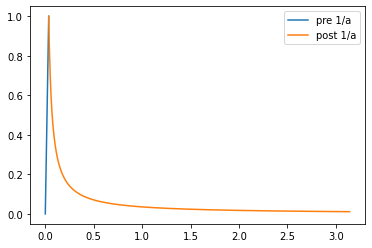

0.03544907701811033


In [108]:
x_axi = np.linspace(0, 1./a, 1000)
x_axii = np.linspace(1./a, np.pi, 1000)
plt.plot(x_axi,  (a*x_axi), label='pre 1/a')
plt.plot(x_axii, 1./(a*x_axii), label='post 1/a')
plt.legend()
plt.show()
print(1/a)

In [111]:
def integrand5i(Dtheta, a, b, n, m):
    return (-1)**m * a**(b*m) * Dtheta**(b*m + 2*n + 1)

def integrand5ii(Dtheta, a, b, n, m):
    return (-1)**m * a**(-b*(m+1)) * Dtheta**(-b*(m+1) + 2*n + 1)

S5 = 0 
#print(1/a)
for n in range(10):
    for m in range(10):
        int5i, erri = quad(integrand5i, 0, 1./a, args=(a, beta, n, m))
        int5ii, errii = quad(integrand5ii, 1./a, np.pi, args=(a, beta, n, m))
        S5 += (-1)**n / factorial(2*n + 1) * (int5i + int5ii)
        #print(erri, errii)
print(S5/2)

0.0003295086777295849


In [112]:
S6=0
for n in range(3):
    for m in range(13):
        i6 = (-1)**m * a**(beta*m) * a**(-beta*m -2*n -2) / (beta*m +2*n +2)
        ii6 = (-1)**m * (np.pi**(-beta*(m+1)+2*n+2) - a**(beta*(m+1)-2*n-2) )
        ii6 /= a**(beta*(m+1))
        ii6 /= (-beta*(m+1) + 2*n +2)
        S6 += (-1)**n / factorial(2*n + 1) * (i6 + ii6)
print(S6/2)

0.00034060767569498915
